## 확률분포의 추정

1. numpy의 설치 
- 가상환경의 선택
- conda install numpy
    Anaconda 설치 경로의 확인:

2. 벡터와 행렬의 생성
    numpy.array 
(1) 리스트를 이용한 벡터의 생성
(2) numpy.zeros(), numpy.ones()
(3) numpy.repeat()
(4) 리스트를 이용한 행렬의 생성
(5) 대각행렬 생성하기 (numpy.diag())

3. 벡터와 행렬의 형태 변환
(1) shape 이해하기
(2) reshape 이해하기 (order = ‘C’ or ‘F’)
----

In [1]:
# 4-2
import numpy as np
import pandas as pd
import seaborn as sns                         # 4-1-2, 4-1-3
import statsmodels.api as sm                  # 4-1-2
import matplotlib.pyplot as plt               # 4-1-2, 4-1-3, 4-2-1
from statsmodels.formula.api import ols       # 4-1-1
from statsmodels.stats.anova import anova_lm  # 4-1-1
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
from scipy.stats import norm, chi2
from scipy.special import erf                 # 4-2-1

from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [2]:
# load data
path_file = "http://ranking.uos.ac.kr/class/VIS/data/" # insert poison file path
poi = pd.read_csv(path_file + 'poison.csv')


- 종속변수 time의 독립변수 poison에 대한 상자그림과 산점도
- pyplot 패키지의 활용
- poison에 따른 time의 평균과 분포는 어떤 차이를 보이는가?


- poison 변수의 값을 기준으로 데이터를 나누기 위해서 값을 확인해본다.

In [11]:
poi['poison'].value_counts()

G1    16
G2    16
G3    16
Name: poison, dtype: int64

- 확인한 poison의 값을 이용하여 데이터를 나눈다. 

In [13]:
x1 = poi['time'][poi['poison']=='G1']
x2 = poi['time'][poi['poison']=='G2']
x3 = poi['time'][poi['poison']=='G3']

- 그래픽 스타일을 'ggplot'으로 바꾸자

In [27]:
plt.style.use('ggplot')

Text(0, 0.5, 'Y: time')

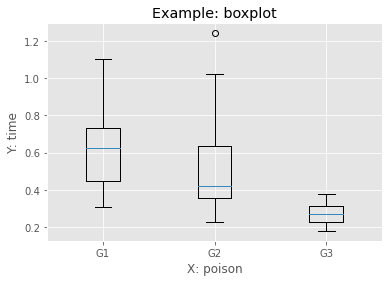

In [30]:
fig, ax = plt.subplots()
ax.boxplot([x1,x2,x3])
ax.set_xticks([1,2,3],['G1','G2','G3'])
ax.set_title('Example: boxplot')
ax.set_xlabel("X: poison")
ax.set_ylabel("Y: time")

In [33]:
poi['treat']

0     A
1     A
2     A
3     A
4     A
5     A
6     A
7     A
8     A
9     A
10    A
11    A
12    B
13    B
14    B
15    B
16    B
17    B
18    B
19    B
20    B
21    B
22    B
23    B
24    C
25    C
26    C
27    C
28    C
29    C
30    C
31    C
32    C
33    C
34    C
35    C
36    D
37    D
38    D
39    D
40    D
41    D
42    D
43    D
44    D
45    D
46    D
47    D
Name: treat, dtype: object

In [ ]:
x1 = poi['time'][poi['poison']=='G1']
x2 = poi['time'][poi['poison']=='G2']
x3 = poi['time'][poi['poison']=='G3']

In [ ]:
#%%
# poison, treat에 따른 그룹 평균 비교
# x축이 posion 일 때
xaxis_poison = np.concatenate([np.ones(4), np.ones(4)*2, np.ones(4)*3])
plt.scatter(xaxis_poison, df_summary_2.loc['mean'].to_numpy())
plt.xlabel('poison')
plt.ylabel('survival time')
plt.show()

# x축이 treat 일 때
xaxis_treat = np.concatenate([range(4)]*3)
plt.scatter(xaxis_treat, df_summary_2.loc['mean'].to_numpy())
plt.xlabel('treat')
plt.ylabel('survival time')
plt.show()


#%%
# pointplot 함수를 이용한 이원분산분석 시각화
sns.pointplot(
    data=df_poi,
    x='poison',                   # X축 : 첫번째 독립변수 poison
    y='time',                     # Y축 : 반응변수 time
    hue='treat',                  # group : 두번째 독립변수 treat
    dodge=True,                   # X축에 따라 group별 위치 구분
    markers=['o', 's', '^', 'D'], # marker 표현
    capsize=0.1,                  # 상자그림 캡 사이즈
    errwidth=1,                   # 상자그림 폭 사이즈
    palette='colorblind'          # 색상 팔레트
    )
plt.xlabel('Poison')
plt.ylabel('Survival time')
plt.show()


In [ ]:
##################################################
################ 4-1-2. 분산분석의 시각화 ####################
#############################################################
# 종속변수 time의 독립변수 poison에 대한 상자그림과 산점도
# seaborn(as sns) 패키지 활용
# poison에 따른 time의 평균과 분포는 어떤 차이를 보이는가?
ax = sns.boxplot(x='poison', y='time', data=poi, color='#99c2a2')
ax = sns.swarmplot(x="poison", y="time", data=poi, color='#7d0013')
plt.xlabel('X : Poison')
plt.ylabel('Y : survival time')
plt.show()


#%%
# residual(잔차)를 이용한 qqplot 그리기
sm.qqplot(one_way_anova.resid, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()


#%%
# residual(잔차)를 이용한 histogram 그리기
plt.hist(one_way_anova.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


#%%
#############################################################
############ 4-1-3. 이원배치 분산분석과 시각화 ###############
#############################################################
# groupby를 이용한 독립변수별 여러개의 기초통계량 계산
df_mean = df_poi.groupby(['poison', 'treat'])['time'].mean()
df_std = df_poi.groupby(['poison', 'treat'])['time'].std()
df_mean.name = 'mean'
df_std.name = 'std'
df_summary_1 = pd.concat([df_mean, df_std], axis=1)
df_summary_1


#%%
# groupby와 agg를 이용하여 효율적인 계산 가능
df_summary_2 = df_poi.groupby(['poison', 'treat'])['time'].agg(['mean', 'std']).round(2).T
df_summary_2


#%%
# poison, treat에 따른 그룹 평균 비교
# x축이 posion 일 때
xaxis_poison = np.concatenate([np.ones(4), np.ones(4)*2, np.ones(4)*3])
plt.scatter(xaxis_poison, df_summary_2.loc['mean'].to_numpy())
plt.xlabel('poison')
plt.ylabel('survival time')
plt.show()

# x축이 treat 일 때
xaxis_treat = np.concatenate([range(4)]*3)
plt.scatter(xaxis_treat, df_summary_2.loc['mean'].to_numpy())
plt.xlabel('treat')
plt.ylabel('survival time')
plt.show()


#%%
# pointplot 함수를 이용한 이원분산분석 시각화
sns.pointplot(
    data=df_poi,
    x='poison',                   # X축 : 첫번째 독립변수 poison
    y='time',                     # Y축 : 반응변수 time
    hue='treat',                  # group : 두번째 독립변수 treat
    dodge=True,                   # X축에 따라 group별 위치 구분
    markers=['o', 's', '^', 'D'], # marker 표현
    capsize=0.1,                  # 상자그림 캡 사이즈
    errwidth=1,                   # 상자그림 폭 사이즈
    palette='colorblind'          # 색상 팔레트
    )
plt.xlabel('Poison')
plt.ylabel('Survival time')
plt.show()
